# K-Space Hamiltonian

In solid-state physics, the **k-space Hamiltonian** (also called the **momentum-space Hamiltonian**) is the representation of the system’s Hamiltonian in terms of **crystal momentum** $\mathbf{k}$ [1], rather than real-space coordinates. This formulation arises naturally in **periodic systems** (like crystals) due to **Bloch's theorem**, which states that the wavefunctions of electrons in a periodic potential can be written as:

$$
\psi_{\mathbf{k}}(\mathbf{r}) = e^{i\mathbf{k} \cdot \mathbf{r}} u_{\mathbf{k}}(\mathbf{r})
$$

Here, $\mathbf{k}$ is the wavevector in the **Brillouin zone**, and $u_{\mathbf{k}}(\mathbf{r})$ has the periodicity of the lattice.



In [1]:
##import the necesaary libraries
import numpy as np
import matplotlib.pyplot as plt
##import the lattice types (triangular, square, hexagonal, etc)
from moirepy import BilayerMoireLattice, TriangularLayer, SquareLayer, KagomeLayer, HexagonalLayer

twist angle = 0.1646 rad (9.4300 deg)
37 points in lower lattice
37 points in upper lattice


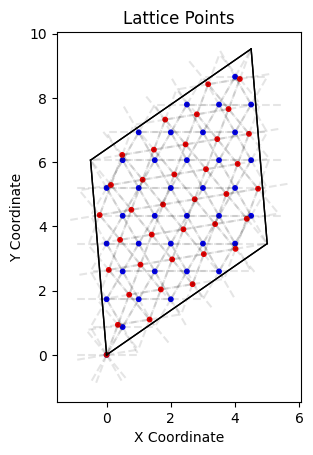

In [2]:
## Make the lattice (Lattice type, a(ll1), b(ll2), m(ul1), n(ul2), x_no, y_no)---  
lattice = BilayerMoireLattice(TriangularLayer, 3, 4, 4, 3, 1, 1) 
#Let's plot the lattice
lattice.plot_lattice()

In [3]:
## make the hamiltonian (tuu, tdd, tud, tdu, tdd, mu1, mu2)
ham = lattice.generate_hamiltonian(1, 1.2, 0.1, 0.1, 0, 0.01)

In [ ]:
eigenvalue, _ = np.linalg.eig(ham)

In [38]:
## Get Moire Lattice Vectors
mlv1 = np.array(lattice.mlv1)  # 1st moire lattice vector
mlv2 = np.array(lattice.mlv2)  # 2nd moire lattice vector
## Compute the 2D cross product (area of the parallelogram)
moire_area = abs(np.cross(mlv1, mlv2))
print(f"Moire Unit cell Area: {moire_area:.2f}")

Moire Unit cell Area: 32.04


/tmp/ipykernel_14808/3871110008.py:5: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  moire_area = abs(np.cross(mlv1, mlv2))


In [ ]:
# Prefactor (2π / Area)
prefactor = (2 * np.pi) / moire_area

# Compute K-space lattice vectors
k1 = prefactor * np.array([mlv2[1], -mlv2[0]])  # (lv2_y, -lv2_x)
k2 = prefactor * np.array([-mlv1[1], mlv1[0]])  # (-lv1_y, lv1_x)
print("1st Moire Reciprocal Lattice Vector: ", k1)
print("2nd Moire Reciprocal Lattice Vector: ", k2)
print("Moire Reciprocal Lattice Area: ", abs(np.cross(k1, k2)))

1st Moire Reciprocal Lattice Vector:  [1.18871073 0.09804321]
2nd Moire Reciprocal Lattice Vector:  [-0.67926328  0.98043209]
Moire Reciprocal Lattice Area:  1.232047298976012


/tmp/ipykernel_14808/1743400146.py:10: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  print("Moire Reciprocal Lattice Area: ", abs(np.cross(k1, k2)))


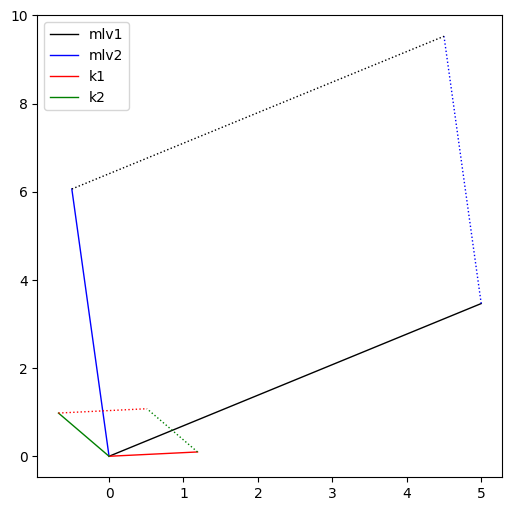

In [35]:
## Lets plot the real and reciprocal Moire unit cell
# plot lv1 and lv2 
plt.figure(figsize=(6, 6))  
plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k', linewidth=1, label='mlv1')
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'blue', linewidth=1, label='mlv2')
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], [mlv1[1], mlv1[1] + mlv2[1]], 'blue', linewidth=1, linestyle='dotted')
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], [mlv2[1], mlv1[1] + mlv2[1]], 'k', linewidth=1, linestyle='dotted')

# plot k1 and k2
plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1, label='k1')
plt.plot([0, k2[0]], [0, k2[1]], 'green', linewidth=1, label='k2')
plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'green', linewidth=1, linestyle='dotted')  
plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1, linestyle='dotted')
plt.legend()

In [36]:
## Get the k space points in the Moire reciprocal lattice
# Generate a grid of k-space points
N1, N2 = 1, 1  # Number of points along each direction
for i in range(N1):
    for j in range(N2):
        k = (i/N1)*k1[0] + (j/N2)*k2[0], (i/N1)*k1[1] + (j/N2)*k2[1]
        print(k)

(np.float64(0.0), np.float64(0.0))


## References
1. Steven H. Simon, The Oxford Solid State Basics, Oxford University Press, 2013
